# <font color='green'>Homework 4</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Question 4</span>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing

In [3]:
df=pd.read_csv("/content/sample_data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


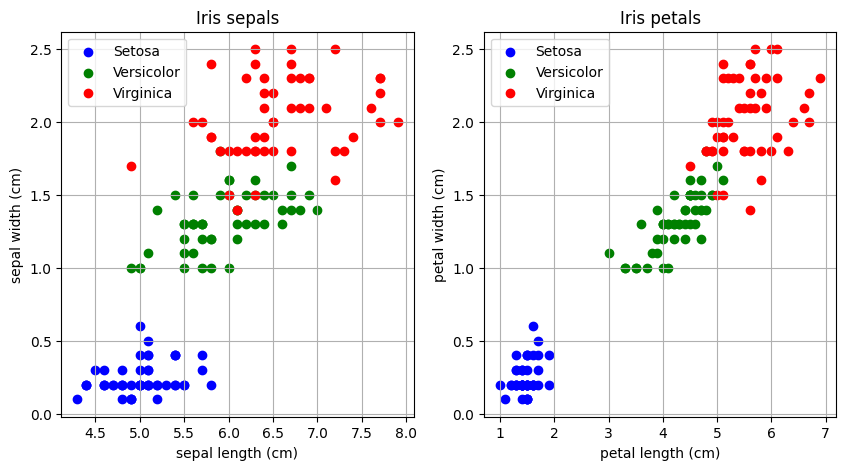

In [ ]:
from matplotlib import axis
setosa = df[df.Species == "Iris-setosa"]
versicolor = df[df.Species=='Iris-versicolor']
virginica = df[df.Species=='Iris-virginica']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax[0].scatter(setosa['SepalLengthCm'], setosa['PetalWidthCm'], label="Setosa", facecolor="blue")
ax[0].scatter(versicolor['SepalLengthCm'], versicolor['PetalWidthCm'], label="Versicolor", facecolor="green")
ax[0].scatter(virginica['SepalLengthCm'], virginica['PetalWidthCm'], label="Virginica", facecolor="red")

ax[0].set_xlabel("sepal length (cm)")
ax[0].set_ylabel("sepal width (cm)")
ax[0].grid()
ax[0].set_title("Iris sepals")
ax[0].legend()

ax[1].scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label="Setosa", facecolor="blue")
ax[1].scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label="Versicolor", facecolor="green")
ax[1].scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label="Virginica", facecolor="red")

ax[1].set_xlabel("petal length (cm)")
ax[1].set_ylabel("petal width (cm)")
ax[1].grid()
ax[1].set_title("Iris petals")
ax[1].legend()

## <span style="color:purple">Part 1&2&3</span>

Accuracy using Linear SVM on sepal 0.8166666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.75      0.63      0.69        19
           2       0.67      0.78      0.72        18

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

Accuracy using Linear SVM on petal 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


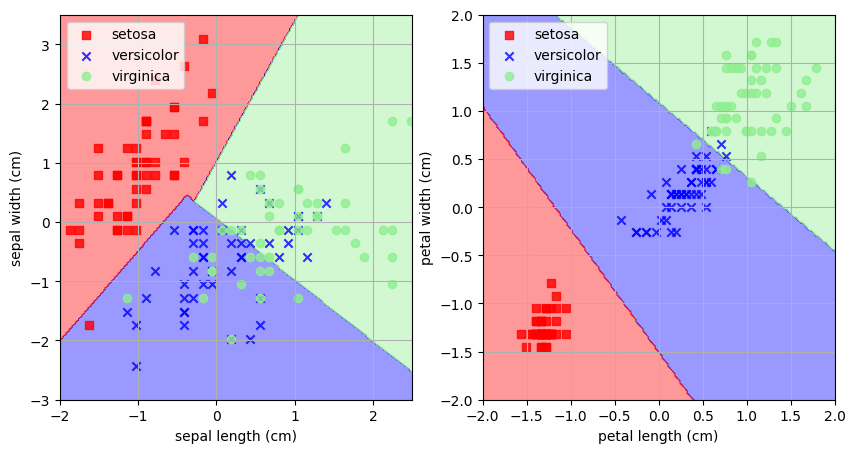

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lin_svc = SVC(kernel='linear').fit(X_train, y_train)
print("Accuracy using Linear SVM on sepal", accuracy_score(lin_svc.predict(X_test), y_test))
print(classification_report(y_test, lin_svc.predict(X_test)))

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, ax, test_idx=None, resolution=0.02, labels=['setosa', 'versicolor', 'virginica'], X_plot=None):

    if X_plot is None:
        X_plot = X

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=labels[cl])

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(X_test[:, 0], X_test[:, 1], c='',
                alpha=1.0, linewidth=1, marker='o',
                s=55, label='test set')
        
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

plot_decision_regions(X=X, y=y, classifier=lin_svc, ax=ax[0])

ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

X = iris.data[:, 2:5]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lin_svc1 = SVC(kernel='linear').fit(X_train, y_train)
print("Accuracy using Linear SVM on petal", accuracy_score(lin_svc1.predict(X_test), y_test))
print(classification_report(y_test, lin_svc1.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=lin_svc1, ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()

Accuracy using SVM with rbf kernel on sepal 0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.63      0.63      0.63        19
           2       0.61      0.61      0.61        18

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on petal 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



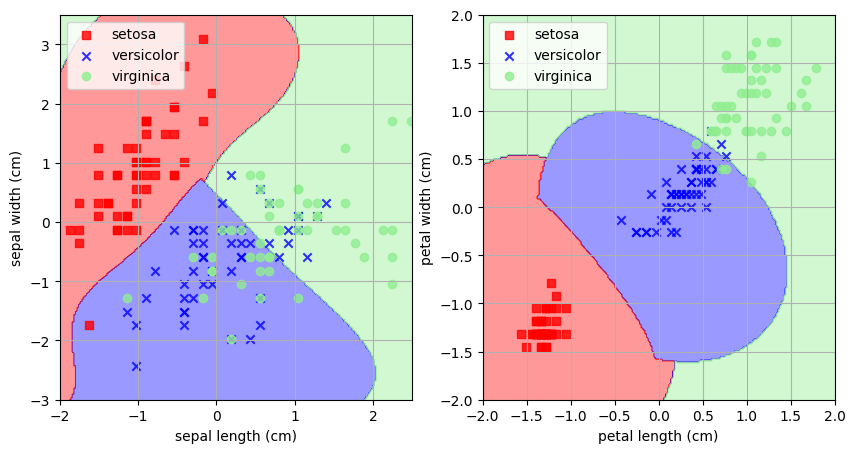

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
print("Accuracy using SVM with rbf kernel on sepal", accuracy_score(rbf_svc.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc.predict(X_test)))

        
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

plot_decision_regions(X=X, y=y, classifier=rbf_svc, ax=ax[0])

ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

X = iris.data[:, 2:4]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc1 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
print("Accuracy using SVM with rbf kernel on petal", accuracy_score(rbf_svc1.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc1.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=rbf_svc1, ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()


Accuracy using SVM with poly(degree=3) kernel on sepal 0.7833333333333333
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.61      0.89      0.72        19
           2       0.82      0.50      0.62        18

    accuracy                           0.78        60
   macro avg       0.81      0.77      0.77        60
weighted avg       0.82      0.78      0.78        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with poly(degree=5) kernel on sepal 0.7166666666666667
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.53      1.00      0.69        19
           2       1.00      0.28      0.43        18

    accuracy                           0.72        60
   macro avg       0.84      0.70      0.68        60
weighted avg       0.85      0.72      0.70        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


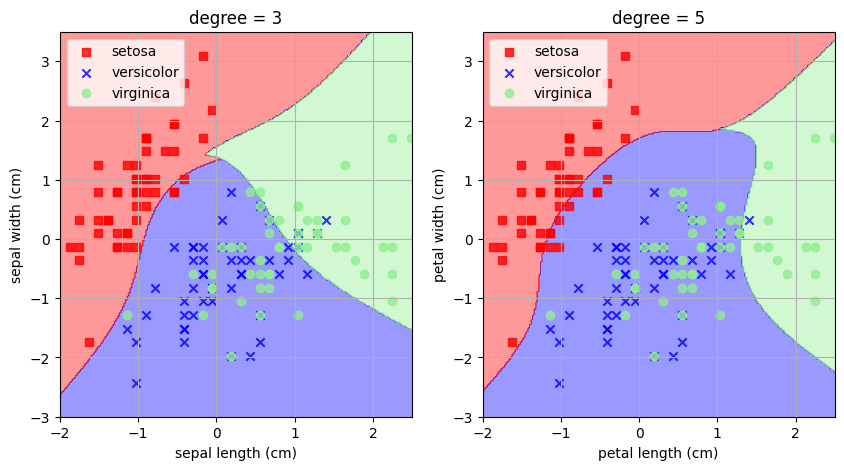

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)
print("Accuracy using SVM with poly(degree=3) kernel on sepal", accuracy_score(poly_svc.predict(X_test), y_test))
print(classification_report(y_test, poly_svc.predict(X_test)))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

plot_decision_regions(X=X, y=y, classifier=poly_svc, ax=ax[0])
ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].set_title('degree = 3')
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

X = iris.data[:, :2]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc1 = SVC(kernel='poly', degree=5).fit(X_train, y_train)
print("Accuracy using SVM with poly(degree=5) kernel on sepal", accuracy_score(poly_svc1.predict(X_test), y_test))
print(classification_report(y_test, poly_svc1.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=poly_svc1, ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].set_title('degree = 5')
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].grid()



Accuracy using SVM with poly(degree=3) kernel on petal 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy using SVM with poly(degree=5) kernel on petal 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.90      1.00      0.95        19
           2       1.00      0.89      0.94        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


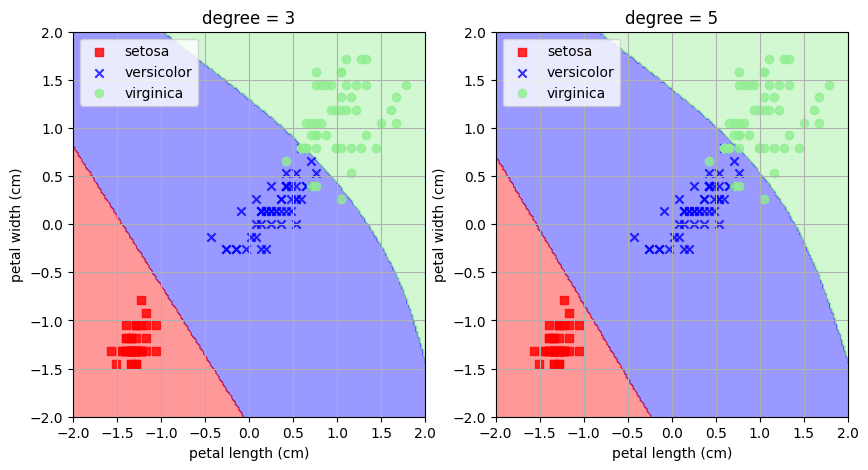

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:5]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)
print("Accuracy using SVM with poly(degree=3) kernel on petal", accuracy_score(poly_svc.predict(X_test), y_test))
print(classification_report(y_test, poly_svc.predict(X_test)))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

plot_decision_regions(X=X, y=y, classifier=poly_svc, ax=ax[0])
ax[0].set_xlabel(feat[2])
ax[0].set_ylabel(feat[3])
ax[0].set_title('degree = 3')
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2., -2, 2.])
ax[0].grid()

X = iris.data[:, 2:5]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc1 = SVC(kernel='poly', degree=5).fit(X_train, y_train)
print("Accuracy using SVM with poly(degree=5) kernel on petal", accuracy_score(poly_svc1.predict(X_test), y_test))
print(classification_report(y_test, poly_svc1.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=poly_svc1, ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].set_title('degree = 5')
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()

## <span style="color:purple">Part 3</span>

Accuracy using SVM with rbf kernel on sepal with C: 0.1, gamma: 1 0.7833333333333333
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.89      0.42      0.57        19
           2       0.59      0.94      0.72        18

    accuracy                           0.78        60
   macro avg       0.83      0.77      0.76        60
weighted avg       0.84      0.78      0.77        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 0.1, gamma: 0.1 0.7166666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.11      0.19        19
           2       0.51      1.00      0.68        18

    accuracy                           0.72        60
   macro avg       0.84      0.70      0.62        60
weighted avg       0.85      0.72      0.65        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Accuracy using SVM with rbf kernel on sepal with C: 0.1, gamma: 0.01 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        19
           2       0.30      1.00      0.46        18

    accuracy                           0.30        60
   macro avg       0.10      0.33      0.15        60
weighted avg       0.09      0.30      0.14        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 1, gamma: 1 0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.63      0.63      0.63        19
           2       0.61      0.61      0.61        18

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 1, gamma: 0.1 0.8166666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.75      0.63      0.69        19
           2       0.67      0.78      0.72        18

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 1, gamma: 0.01 0.85
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.86      0.63      0.73        19
           2       0.70      0.89      0.78        18

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.86      0.85      0.85        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 100, gamma: 1 0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.60      0.79      0.68        19
           2       0.67      0.44      0.53        18

    accuracy                           0.77        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.77      0.77      0.76        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 100, gamma: 0.1 0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.63      0.63      0.63        19
           2       0.61      0.61      0.61        18

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on sepal with C: 100, gamma: 0.01 0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.63      0.63      0.63        19
           2       0.61      0.61      0.61        18

    accuracy                           0.77        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


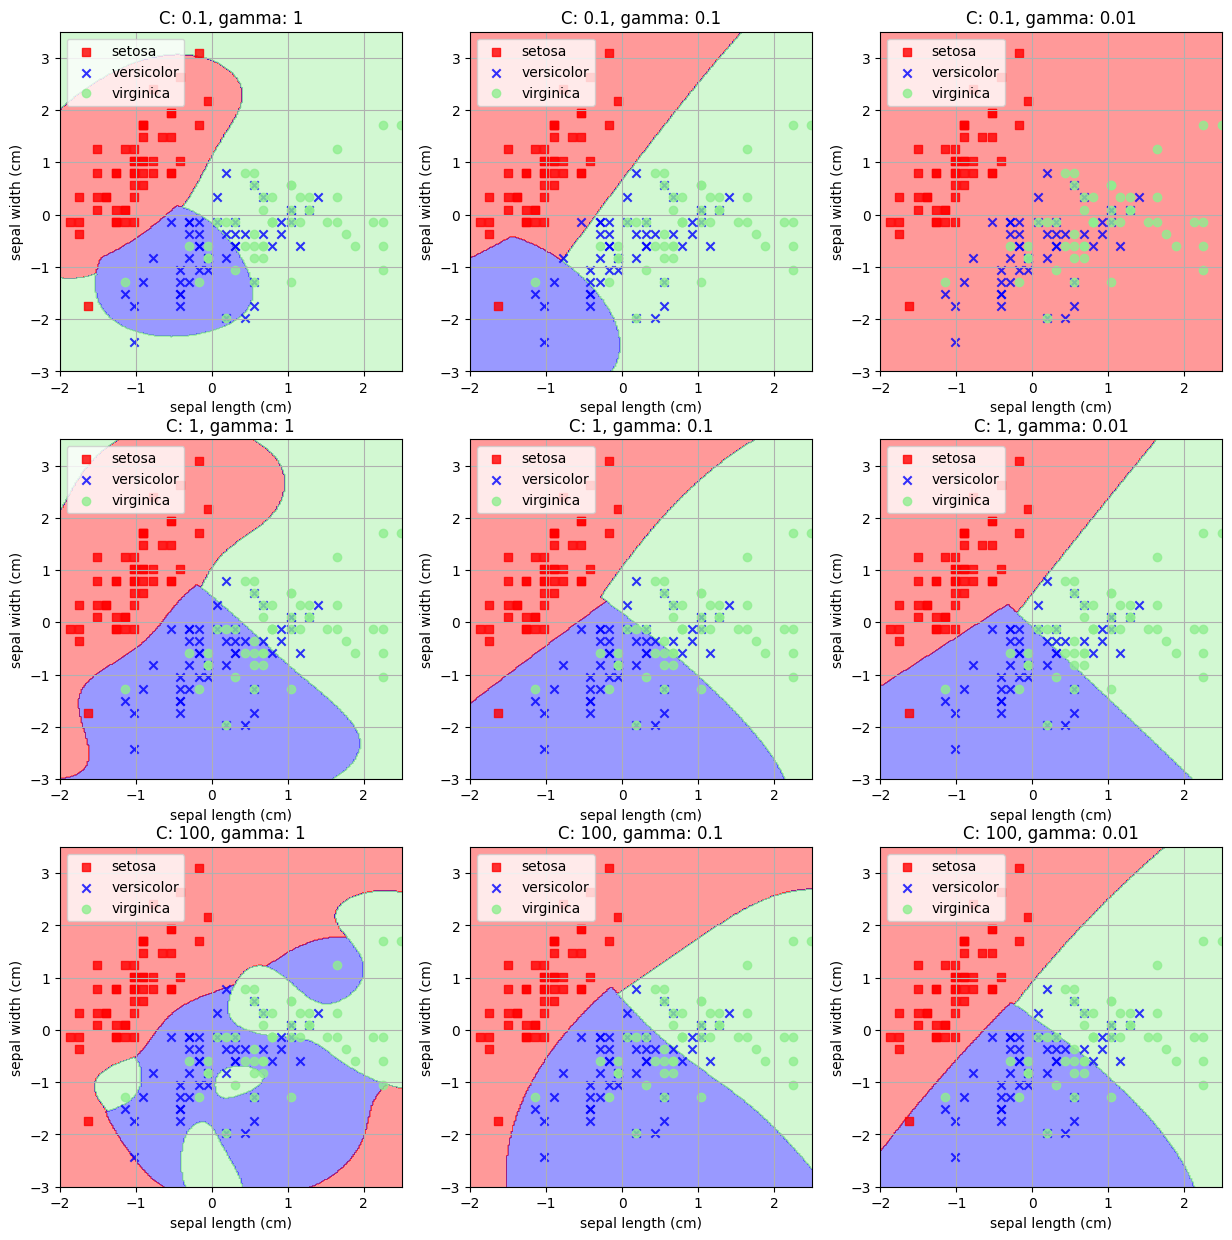

In [ ]:
C_ = [0.1,1,100]
gamma_  =[1,0.1,0.01]
fig, ax = plt.subplots(len(C_), len(gamma_))
fig.set_size_inches(15, 15)

for c in C_:
  for gamma in gamma_:
    X = iris.data[:, :2]

    y = iris.target
    colors = "bry"

    X = preprocessing.StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    rbf_svc = SVC(kernel='rbf', gamma=gamma, C=c).fit(X_train, y_train)
    print("Accuracy using SVM with rbf kernel on sepal with C: {0}, gamma: {1}".format(c,gamma), accuracy_score(rbf_svc.predict(X_test), y_test))
    print(classification_report(y_test, rbf_svc.predict(X_test)))

    i = C_.index(c)
    j = gamma_.index(gamma)
    plot_decision_regions(X=X, y=y, classifier=rbf_svc, ax=ax[i][j])
    ax[i][j].set_xlabel(feat[0])
    ax[i][j].set_ylabel(feat[1])
    ax[i][j].set_title("C: {0}, gamma: {1}".format(c,gamma))
    ax[i][j].legend(loc='upper left')

    ax[i][j].axis([-2, 2.5, -3, 3.5])
    ax[i][j].grid()

Accuracy using SVM with rbf kernel on petal with C: 0.1, gamma: 1 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on petal with C: 0.1, gamma: 0.1 0.8166666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.42      0.59        19
           2       0.62      1.00      0.77        18

    accuracy                           0.82        60
   macro avg       0.87      0.81      0.79        60
weighted avg       0.89      0.82      0.80        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Accuracy using SVM with rbf kernel on petal with C: 0.1, gamma: 0.01 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        19
           2       0.30      1.00      0.46        18

    accuracy                           0.30        60
   macro avg       0.10      0.33      0.15        60
weighted avg       0.09      0.30      0.14        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on petal with C: 1, gamma: 1 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy using SVM with rbf kernel on petal with C: 1, gamma: 0.1 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using SVM with rbf kernel on petal with C: 1, gamma: 0.01 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.84      0.91        19
           2       0.86      1.00      0.92        18

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence 

Accuracy using SVM with rbf kernel on petal with C: 100, gamma: 1 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy using SVM with rbf kernel on petal with C: 100, gamma: 0.1 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy using SVM with rbf kernel on petal with C: 100, gamma: 0.

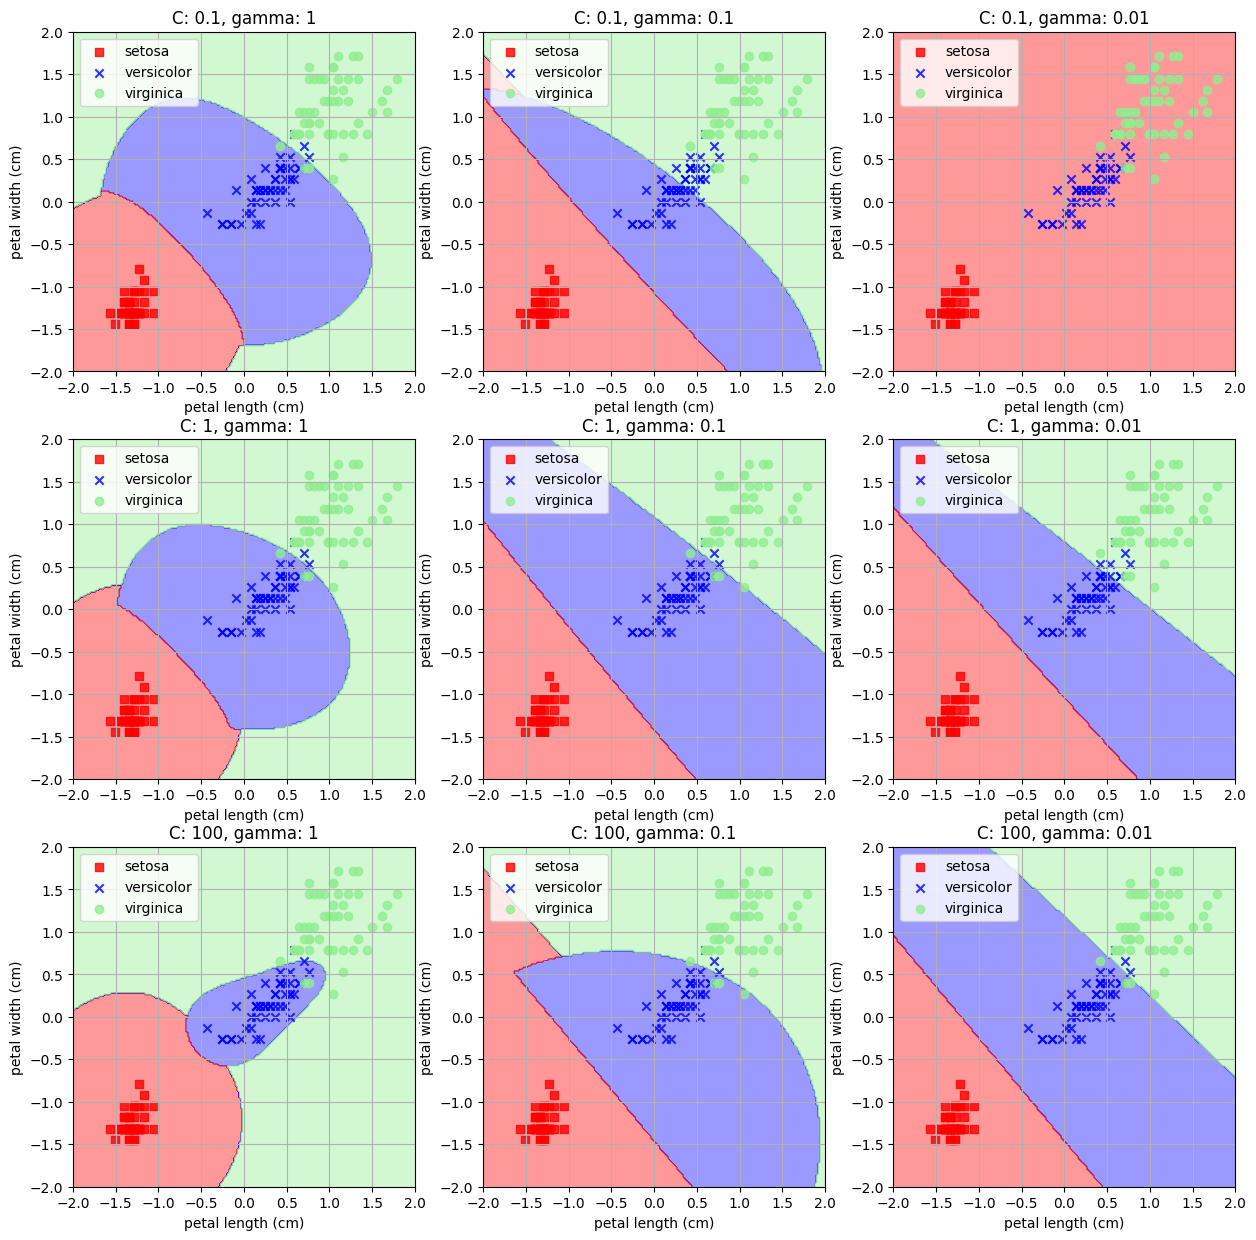

In [ ]:
C_ = [0.1,1,100]
gamma_  =[1,0.1,0.01]
fig, ax = plt.subplots(len(C_), len(gamma_))
fig.set_size_inches(15, 15)

for c in C_:
  for gamma in gamma_:
    X = iris.data[:, 2:4]

    y = iris.target
    colors = "bry"

    X = preprocessing.StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    rbf_svc = SVC(kernel='rbf', gamma=gamma, C=c).fit(X_train, y_train)
    print("Accuracy using SVM with rbf kernel on petal with C: {0}, gamma: {1}".format(c,gamma), accuracy_score(rbf_svc.predict(X_test), y_test))
    print(classification_report(y_test, rbf_svc.predict(X_test)))

    i = C_.index(c)
    j = gamma_.index(gamma)
    plot_decision_regions(X=X, y=y, classifier=rbf_svc, ax=ax[i][j])
    ax[i][j].set_xlabel(feat[2])
    ax[i][j].set_ylabel(feat[3])
    ax[i][j].set_title("C: {0}, gamma: {1}".format(c,gamma))
    ax[i][j].legend(loc='upper left')

    ax[i][j].axis([-2, 2., -2, 2.])
    ax[i][j].grid()

## <span style="color:purple">Part 5</span>

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.778 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.722 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.778 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.778 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.722 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.778 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.722 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.778 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.778 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.722 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.778 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;,

<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.722 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.722 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.722 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.722 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.611 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.556 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.556 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;,

<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.778 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.722 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.667 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.389 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.389 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.389 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;,

<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.778 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.944 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.778 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.944 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;,

<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.778 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.944 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.778 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.722 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.667 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.722 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;,

<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-58-11bc235e5d2b>:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.889 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.889 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.944 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.944 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.444 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.556 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.333 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.444 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;,

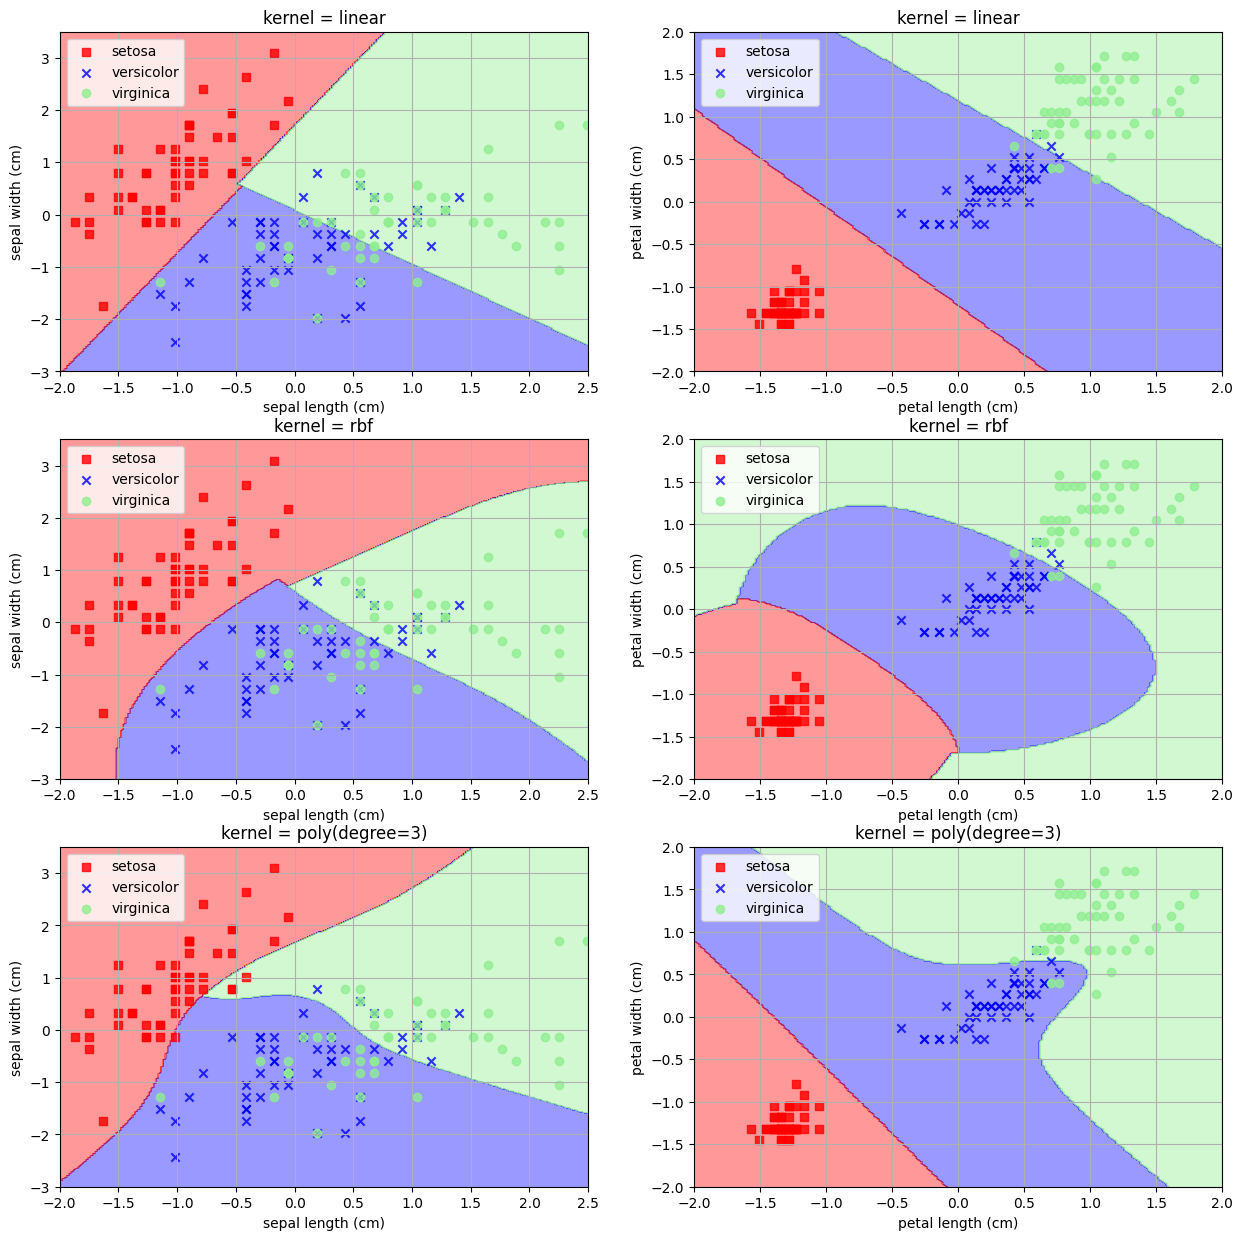

In [ ]:
from sklearn.model_selection import GridSearchCV

fig, ax = plt.subplots(3,2)
fig.set_size_inches(15, 15)

param_grid = {'C':[0.1,1,100], 'gamma':[1,0.1,0.01]}

X = iris.data[:, :2]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

print("Accuracy using Linear SVM on sepal", accuracy_score(grid.predict(X_test), y_test))
print(classification_report(y_test, grid.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=grid, ax=ax[0][0])
ax[0][0].set_xlabel(feat[0])
ax[0][0].set_ylabel(feat[1])
ax[0][0].set_title('kernel = linear')
ax[0][0].legend(loc='upper left')

ax[0][0].axis([-2, 2.5, -3, 3.5])
ax[0][0].grid()


grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

print("Accuracy using SVM with rbf kernel on sepal with", accuracy_score(grid.predict(X_test), y_test))
print(classification_report(y_test, grid.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=grid, ax=ax[1][0])
ax[1][0].set_xlabel(feat[0])
ax[1][0].set_ylabel(feat[1])
ax[1][0].set_title('kernel = rbf')
ax[1][0].legend(loc='upper left')

ax[1][0].axis([-2, 2.5, -3, 3.5])
ax[1][0].grid()

grid = GridSearchCV(SVC(kernel='poly', degree=3), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

print("Accuracy using SVM with poly(degree=3) kernel on sepal with", accuracy_score(grid.predict(X_test), y_test))
print(classification_report(y_test, grid.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=grid, ax=ax[2][0])
ax[2][0].set_xlabel(feat[0])
ax[2][0].set_ylabel(feat[1])
ax[2][0].set_title('kernel = poly(degree=3)')
ax[2][0].legend(loc='upper left')

ax[2][0].axis([-2, 2.5, -3, 3.5])
ax[2][0].grid()

X = iris.data[:, 2:4]

y = iris.target
colors = "bry"

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

print("Accuracy using Linear SVM on petal", accuracy_score(grid.predict(X_test), y_test))
print(classification_report(y_test, grid.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=grid, ax=ax[0][1])
ax[0][1].set_xlabel(feat[2])
ax[0][1].set_ylabel(feat[3])
ax[0][1].set_title('kernel = linear')
ax[0][1].legend(loc='upper left')

ax[0][1].axis([-2, 2., -2, 2.])
ax[0][1].grid()


grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

print("Accuracy using SVM with rbf kernel on petal with", accuracy_score(grid.predict(X_test), y_test))
print(classification_report(y_test, grid.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=grid, ax=ax[1][1])
ax[1][1].set_xlabel(feat[2])
ax[1][1].set_ylabel(feat[3])
ax[1][1].set_title('kernel = rbf')
ax[1][1].legend(loc='upper left')

ax[1][1].axis([-2, 2., -2, 2.])
ax[1][1].grid()

grid = GridSearchCV(SVC(kernel='poly', degree=3), param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

print("Accuracy using SVM with poly(degree=3) kernel on petal with", accuracy_score(grid.predict(X_test), y_test))
print(classification_report(y_test, grid.predict(X_test)))

plot_decision_regions(X=X, y=y, classifier=grid, ax=ax[2][1])
ax[2][1].set_xlabel(feat[2])
ax[2][1].set_ylabel(feat[3])
ax[2][1].set_title('kernel = poly(degree=3)')
ax[2][1].legend(loc='upper left')

ax[2][1].axis([-2, 2., -2, 2.])
ax[2][1].grid()

## <span style="color:purple">Part 6</span>


### <span style="color:purple">one-vs-one SVM with linear kernel classifiers</span>

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis=1)
y = df['Species']

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_clf = SVC(kernel='linear').fit(X_train, y_train)

def plot_svc_decision_boundary(w, b, xmin, xmax, type, ax):
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    '''
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    '''
    ax.plot(x0, decision_boundary, "k-", linewidth=2, label=type)
    ax.plot(x0, gutter_up, "k--", linewidth=2)
    ax.plot(x0, gutter_down, "k--", linewidth=2)

w0 = svm_clf.coef_[0]
b0 = svm_clf.intercept_[0]

w1 = svm_clf.coef_[1]
b1 = svm_clf.intercept_[1]

w2 = svm_clf.coef_[2]
b2 = svm_clf.intercept_[2]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 0.8
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.70      0.54      0.61        13
 Iris-virginica       0.62      0.77      0.69        13

       accuracy                           0.80        45
      macro avg       0.78      0.77      0.77        45
   weighted avg       0.81      0.80      0.80        45



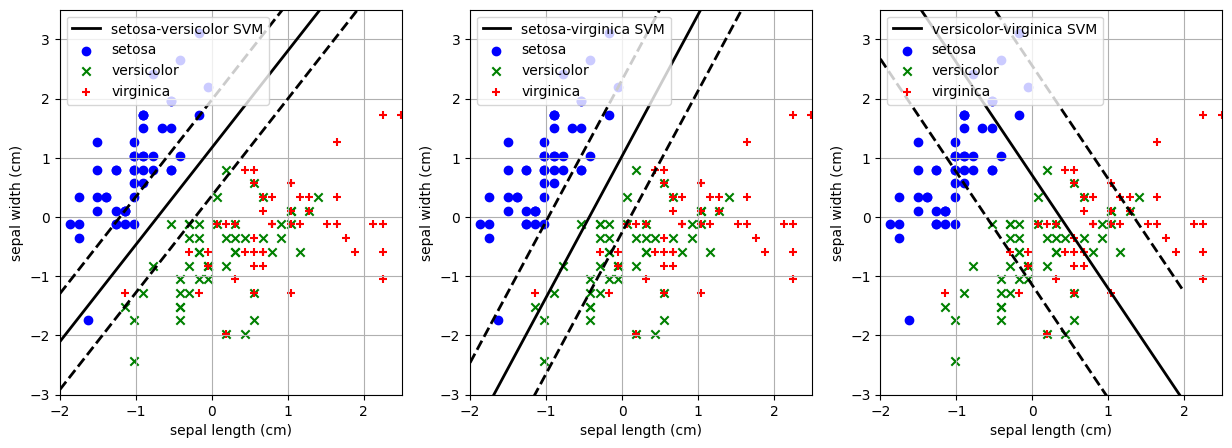

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_svc_decision_boundary(w0, b0, -2, 2, 'setosa-versicolor SVM', ax[0])

ax[0].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[0].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[0].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].set_xlabel("sepal length (cm)")
ax[0].set_ylabel("sepal width (cm)")
ax[0].grid()
ax[0].legend(loc='upper left')

plot_svc_decision_boundary(w1, b1, -2, 2, 'setosa-virginica SVM', ax[1])

ax[1].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[1].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[1].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].set_xlabel("sepal length (cm)")
ax[1].set_ylabel("sepal width (cm)")
ax[1].grid()
ax[1].legend(loc='upper left')

plot_svc_decision_boundary(w2, b2, -2, 2, 'versicolor-virginica SVM', ax[2])

ax[2].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[2].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[2].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[2].axis([-2, 2.5, -3, 3.5])
ax[2].set_xlabel("sepal length (cm)")
ax[2].set_ylabel("sepal width (cm)")
ax[2].grid()
ax[2].legend(loc='upper left')

In [ ]:
X = df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1)
y = df['Species']

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w0 = svm_clf.coef_[0]
b0 = svm_clf.intercept_[0]

w1 = svm_clf.coef_[1]
b1 = svm_clf.intercept_[1]

w2 = svm_clf.coef_[2]
b2 = svm_clf.intercept_[2]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 0.9833333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



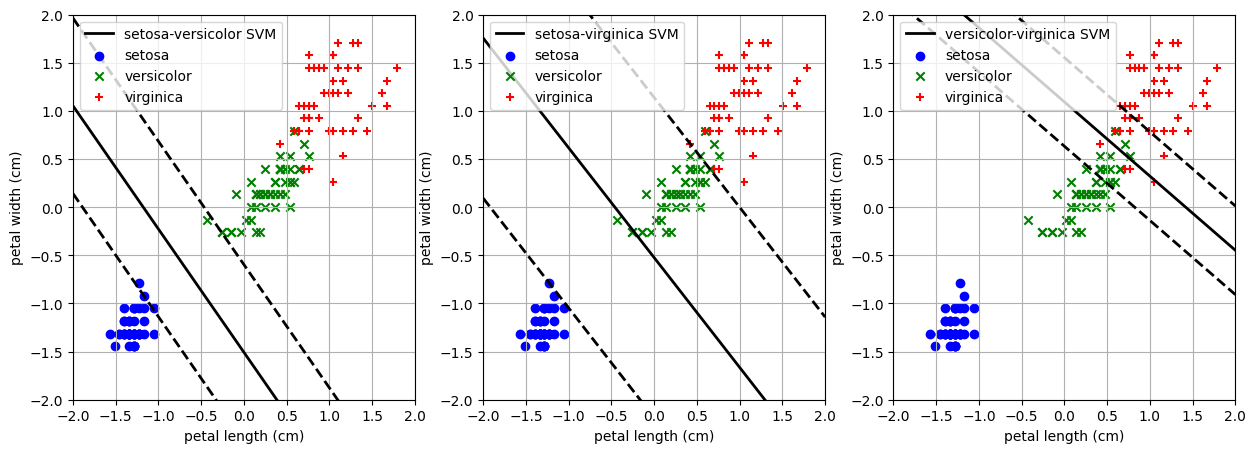

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_svc_decision_boundary(w0, b0, -2, 2, 'setosa-versicolor SVM', ax[0])

ax[0].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[0].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[0].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[0].axis([-2, 2., -2, 2.])
ax[0].set_xlabel("petal length (cm)")
ax[0].set_ylabel("petal width (cm)")
ax[0].grid()
ax[0].legend(loc='upper left')

plot_svc_decision_boundary(w1, b1, -2, 2, 'setosa-virginica SVM', ax[1])

ax[1].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[1].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[1].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[1].axis([-2, 2., -2, 2.])
ax[1].set_xlabel("petal length (cm)")
ax[1].set_ylabel("petal width (cm)")
ax[1].grid()
ax[1].legend(loc='upper left')

plot_svc_decision_boundary(w2, b2, -2, 2, 'versicolor-virginica SVM', ax[2])

ax[2].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[2].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[2].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[2].axis([-2, 2., -2, 2.])
ax[2].set_xlabel("petal length (cm)")
ax[2].set_ylabel("petal width (cm)")
ax[2].grid()
ax[2].legend(loc='upper left')

### <span style="color:purple">one-vs-all SVM with linear kernel classifiers</span>

In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")

df.loc[df['Species']!='Iris-setosa', 'Species'] = 'non-setosa'

y = df['Species']

In [ ]:
X = df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis=1)

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w0 = svm_clf.coef_[0]
b0 = svm_clf.intercept_[0]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 1.0
              precision    recall  f1-score   support

 Iris-setosa       1.00      1.00      1.00        23
  non-setosa       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")

df.loc[df['Species']!='Iris-versicolor', 'Species'] = 'non-versicolor'

y = df['Species']

In [ ]:
X = df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis=1)

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w1 = svm_clf.coef_[0]
b1 = svm_clf.intercept_[0]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 0.7
                 precision    recall  f1-score   support

Iris-versicolor       0.57      0.21      0.31        19
 non-versicolor       0.72      0.93      0.81        41

       accuracy                           0.70        60
      macro avg       0.64      0.57      0.56        60
   weighted avg       0.67      0.70      0.65        60



In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")

df.loc[df['Species']!='Iris-virginica', 'Species'] = 'non-virginica'

y = df['Species']

In [ ]:
X = df.drop(['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'], axis=1)

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w2 = svm_clf.coef_[0]
b2 = svm_clf.intercept_[0]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 0.8666666666666667
                precision    recall  f1-score   support

Iris-virginica       0.73      0.89      0.80        18
 non-virginica       0.95      0.86      0.90        42

      accuracy                           0.87        60
     macro avg       0.84      0.87      0.85        60
  weighted avg       0.88      0.87      0.87        60



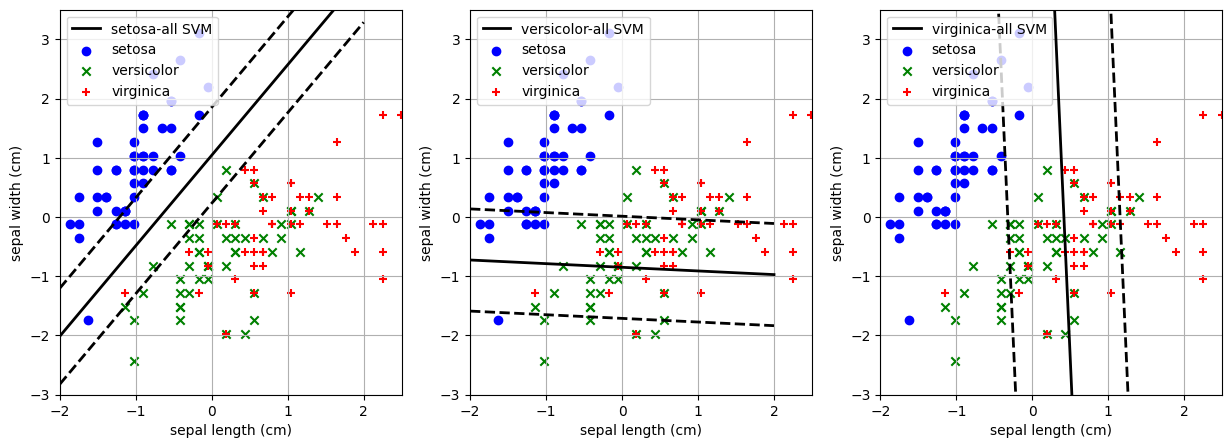

In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")
y = df['Species']

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_svc_decision_boundary(w0, b0, -2, 2, 'setosa-all SVM', ax[0])

ax[0].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[0].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[0].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].set_xlabel("sepal length (cm)")
ax[0].set_ylabel("sepal width (cm)")
ax[0].grid()
ax[0].legend(loc='upper left')

plot_svc_decision_boundary(w1, b1, -2, 2, 'versicolor-all SVM', ax[1])

ax[1].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[1].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[1].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].set_xlabel("sepal length (cm)")
ax[1].set_ylabel("sepal width (cm)")
ax[1].grid()
ax[1].legend(loc='upper left')

plot_svc_decision_boundary(w2, b2, -2, 2, 'virginica-all SVM', ax[2])

ax[2].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[2].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[2].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[2].axis([-2, 2.5, -3, 3.5])
ax[2].set_xlabel("sepal length (cm)")
ax[2].set_ylabel("sepal width (cm)")
ax[2].grid()
ax[2].legend(loc='upper left')

In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")

df.loc[df['Species']!='Iris-setosa', 'Species'] = 'non-setosa'

y = df['Species']

In [ ]:
X = df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1)

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w0 = svm_clf.coef_[0]
b0 = svm_clf.intercept_[0]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 1.0
              precision    recall  f1-score   support

 Iris-setosa       1.00      1.00      1.00        23
  non-setosa       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")

df.loc[df['Species']!='Iris-versicolor', 'Species'] = 'non-versicolor'

y = df['Species']

In [ ]:
X = df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1)

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w1 = svm_clf.coef_[0]
b1 = svm_clf.intercept_[0]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 0.6833333333333333
                 precision    recall  f1-score   support

Iris-versicolor       0.00      0.00      0.00        19
 non-versicolor       0.68      1.00      0.81        41

       accuracy                           0.68        60
      macro avg       0.34      0.50      0.41        60
   weighted avg       0.47      0.68      0.55        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")

df.loc[df['Species']!='Iris-virginica', 'Species'] = 'non-virginica'

y = df['Species']

In [ ]:
X = df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm', 'Species'], axis=1)

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

w2 = svm_clf.coef_[0]
b2 = svm_clf.intercept_[0]

print("Accuracy using Linear SVM", accuracy_score(svm_clf.predict(X_test), y_test))
print(classification_report(y_test, svm_clf.predict(X_test)))

Accuracy using Linear SVM 0.9833333333333333
                precision    recall  f1-score   support

Iris-virginica       1.00      0.94      0.97        18
 non-virginica       0.98      1.00      0.99        42

      accuracy                           0.98        60
     macro avg       0.99      0.97      0.98        60
  weighted avg       0.98      0.98      0.98        60



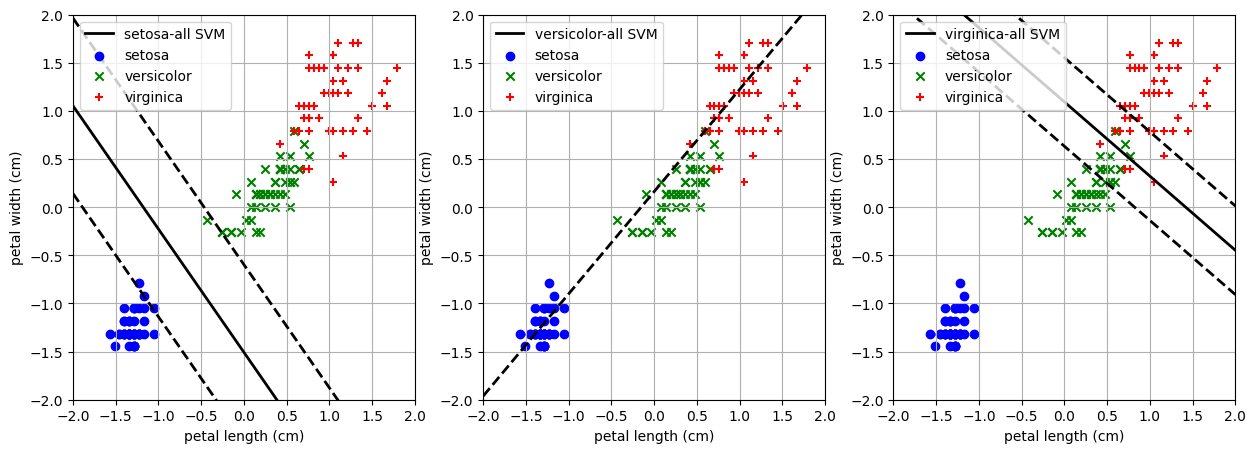

In [ ]:
df=pd.read_csv("/content/sample_data/Iris.csv")
y = df['Species']

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_svc_decision_boundary(w0, b0, -2, 2, 'setosa-all SVM', ax[0])

ax[0].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[0].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[0].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[0].axis([-2, 2., -2, 2.])
ax[0].set_xlabel("petal length (cm)")
ax[0].set_ylabel("petal width (cm)")
ax[0].grid()
ax[0].legend(loc='upper left')

plot_svc_decision_boundary(w1, b1, -2, 2, 'versicolor-all SVM', ax[1])

ax[1].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[1].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[1].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[1].axis([-2, 2., -2, 2.])
ax[1].set_xlabel("petal length (cm)")
ax[1].set_ylabel("petal width (cm)")
ax[1].grid()
ax[1].legend(loc='upper left')

plot_svc_decision_boundary(w2, b2, -2, 2, 'virginica-all SVM', ax[2])

ax[2].scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1],
            color='blue', marker='o', label='setosa')
ax[2].scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1],
            color='green', marker='x', label='versicolor')
ax[2].scatter(X[y == 'Iris-virginica', 0], X[y == 'Iris-virginica', 1],
            color='red', marker='+', label='virginica')

ax[2].axis([-2, 2., -2, 2.])
ax[2].set_xlabel("petal length (cm)")
ax[2].set_ylabel("petal width (cm)")
ax[2].grid()
ax[2].legend(loc='upper left')

### <span style="color:purple">one-vs-one SVM with rbf kernel classifiers</span>

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, labels, ax, test_idx=None, resolution=0.02, X_plot=None):

    if X_plot is None:
        X_plot = X

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
   
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=labels[cl])

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(X_test[:, 0], X_test[:, 1], c='',
                alpha=1.0, linewidth=1, marker='o',
                s=55, label='test set')

<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (setosa vs versicolor) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (setosa vs virginica) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (versicolor vs virginica) 0.775
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.70      0.82      0.76        17

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.77        40
weighted avg       0.79      0.78      0.78        40



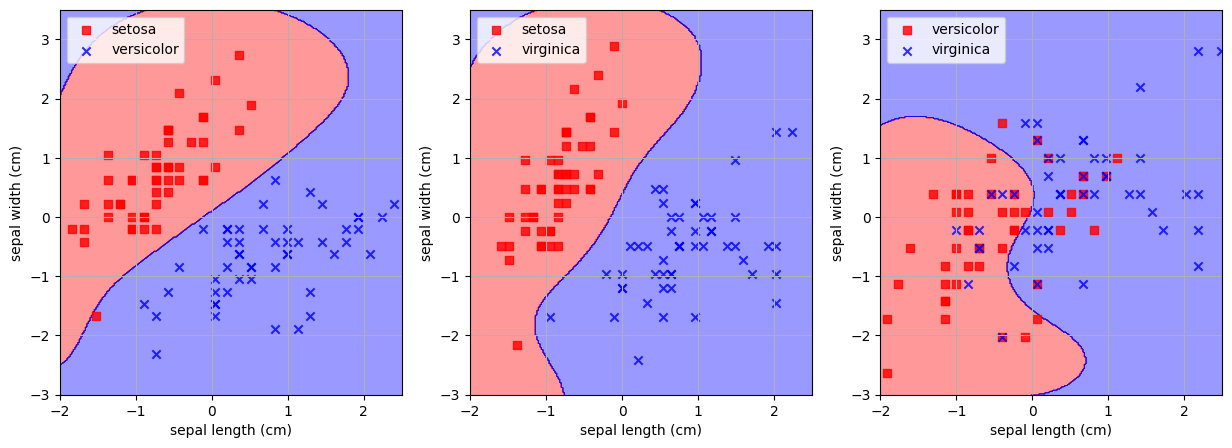

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=2)]
y = y[np.where(y!=2)]

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=rbf_svc, labels=['setosa', 'versicolor'], ax=ax[0])
ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

print("Accuracy using RBF SVM (setosa vs versicolor)", accuracy_score(rbf_svc.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=1)]
y = y[np.where(y!=1)]
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc1 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc1, labels=['setosa', 'virginica'], ax=ax[1])
ax[1].set_xlabel(feat[0])
ax[1].set_ylabel(feat[1])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].grid()

print("Accuracy using RBF SVM (setosa vs virginica)", accuracy_score(rbf_svc1.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=0)]
y = y[np.where(y!=0)]
y[y != 2] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc2 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc2, labels=['versicolor', 'virginica'], ax=ax[2])
ax[2].set_xlabel(feat[0])
ax[2].set_ylabel(feat[1])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2.5, -3, 3.5])
ax[2].grid()

print("Accuracy using RBF SVM (versicolor vs virginica)", accuracy_score(rbf_svc2.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc2.predict(X_test)))

<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (setosa vs versicolor) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (setosa vs virginica) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (versicolor vs virginica) 0.95
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.88      0.94        17

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



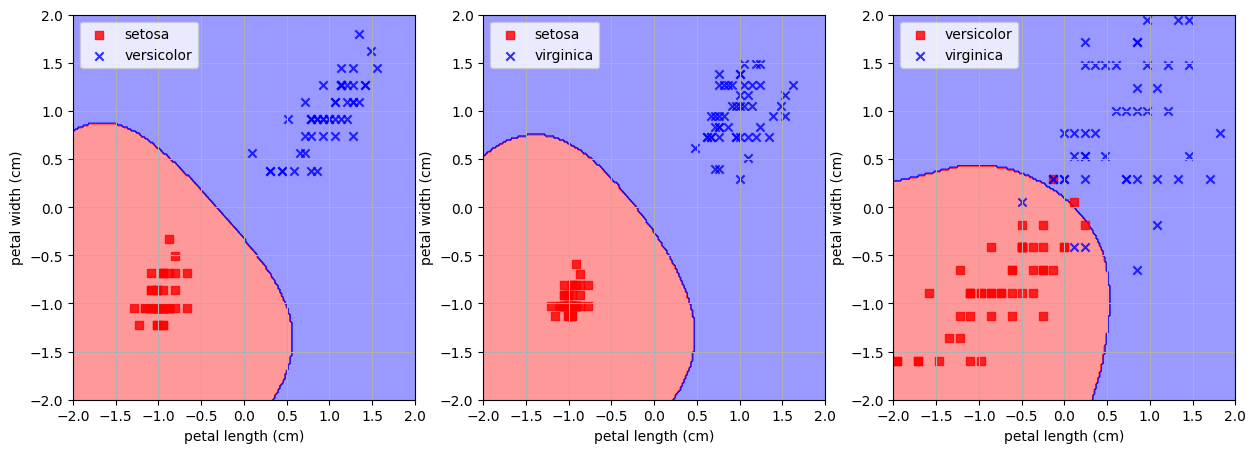

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  
y = iris.target
X = X[np.where(y!=2)]
y = y[np.where(y!=2)]

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=rbf_svc, labels=['setosa', 'versicolor'], ax=ax[0])
ax[0].set_xlabel(feat[2])
ax[0].set_ylabel(feat[3])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2., -2, 2.])
ax[0].grid()

print("Accuracy using RBF SVM (setosa vs versicolor)", accuracy_score(rbf_svc.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  
y = iris.target
X = X[np.where(y!=1)]
y = y[np.where(y!=1)]
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc1 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc1, labels=['setosa', 'virginica'], ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()

print("Accuracy using RBF SVM (setosa vs virginica)", accuracy_score(rbf_svc1.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  
y = iris.target
X = X[np.where(y!=0)]
y = y[np.where(y!=0)]
y[y == 1] = 0
y[y == 2] = 1 
X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc2 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc2, labels=['versicolor', 'virginica'], ax=ax[2])
ax[2].set_xlabel(feat[2])
ax[2].set_ylabel(feat[3])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2., -2, 2.])
ax[2].grid()

print("Accuracy using RBF SVM (versicolor vs virginica)", accuracy_score(rbf_svc2.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc2.predict(X_test)))

### <span style="color:purple">one-vs-all SVM with rbf kernel classifiers</span>

<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (setosa vs all) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (versicolor vs all) 0.7666666666666667
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.83      0.83      0.83        41

    accuracy                           0.77        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.77      0.77      0.77        60



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (virginica vs all) 0.7666666666666667
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.83      0.83      0.83        42

    accuracy                           0.77        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.77      0.77      0.77        60



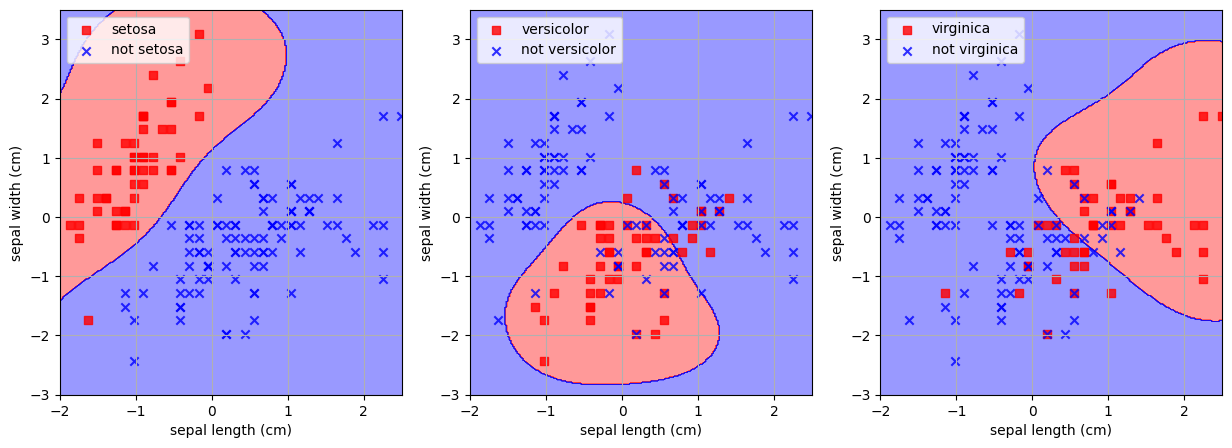

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  

y = iris.target
y[y != 0] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=rbf_svc, labels=['setosa', 'not setosa'], ax=ax[0])
ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

print("Accuracy using RBF SVM (setosa vs all)", accuracy_score(rbf_svc.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  

y = iris.target
y[y == 0] = 2 
y[y == 1] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc1 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc1, labels=['versicolor', 'not versicolor'], ax=ax[1])
ax[1].set_xlabel(feat[0])
ax[1].set_ylabel(feat[1])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].grid()

print("Accuracy using RBF SVM (versicolor vs all)", accuracy_score(rbf_svc1.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  

y = iris.target
y[y != 2] = 1 
y[y == 2] = 0 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc2 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc2, labels=['virginica', 'not virginica'], ax=ax[2])
ax[2].set_xlabel(feat[0])
ax[2].set_ylabel(feat[1])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2.5, -3, 3.5])
ax[2].grid()

print("Accuracy using RBF SVM (virginica vs all)", accuracy_score(rbf_svc2.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc2.predict(X_test)))

<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (setosa vs all) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (versicolor vs all) 0.9833333333333333
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.98      0.99        41

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



<ipython-input-77-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using RBF SVM (virginica vs all) 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.98      1.00      0.99        42

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



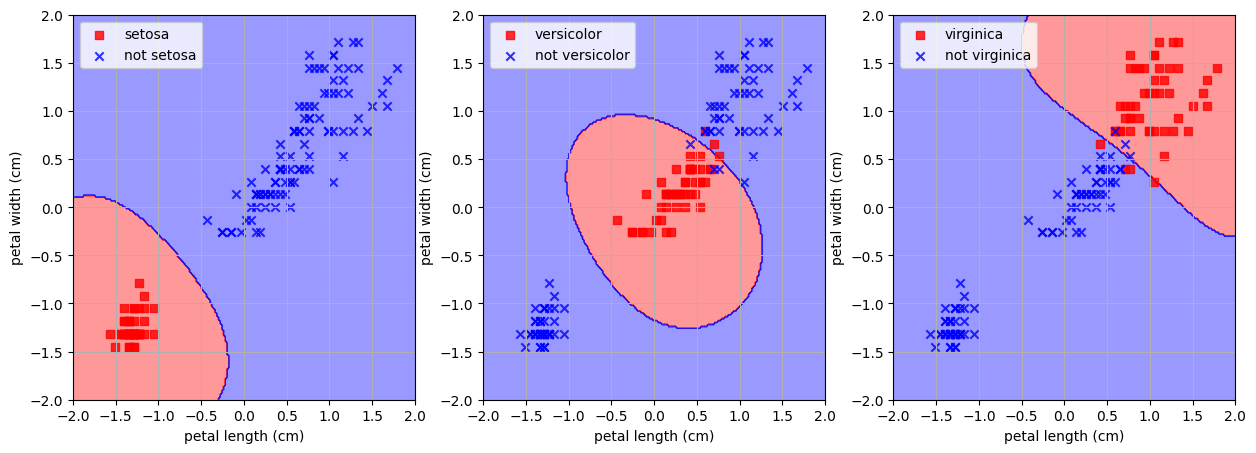

In [ ]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  

y = iris.target
y[y != 0] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=rbf_svc, labels=['setosa', 'not setosa'], ax=ax[0])
ax[0].set_xlabel(feat[2])
ax[0].set_ylabel(feat[3])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2., -2, 2.])
ax[0].grid()

print("Accuracy using RBF SVM (setosa vs all)", accuracy_score(rbf_svc.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  

y = iris.target
y[y == 0] = 2 
y[y == 1] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc1 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc1, labels=['versicolor', 'not versicolor'], ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()

print("Accuracy using RBF SVM (versicolor vs all)", accuracy_score(rbf_svc1.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  

y = iris.target
y[y != 2] = 1 
y[y == 2] = 0 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rbf_svc2 = SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=rbf_svc2, labels=['virginica', 'not virginica'], ax=ax[2])
ax[2].set_xlabel(feat[2])
ax[2].set_ylabel(feat[3])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2., -2, 2.])
ax[2].grid()

print("Accuracy using RBF SVM (virginica vs all)", accuracy_score(rbf_svc2.predict(X_test), y_test))
print(classification_report(y_test, rbf_svc2.predict(X_test)))

### <span style="color:purple">one-vs-one SVM with poly(degree=3) kernel classifiers</span>

<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (setosa vs versicolor) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy using poly SVM (setosa vs virginica) 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (versicolor vs virginica) 0.65
              precision    recall  f1-score   support

           0       0.85      0.48      0.61        23
           1       0.56      0.88      0.68        17

    accuracy                           0.65        40
   macro avg       0.70      0.68      0.65        40
weighted avg       0.72      0.65      0.64        40



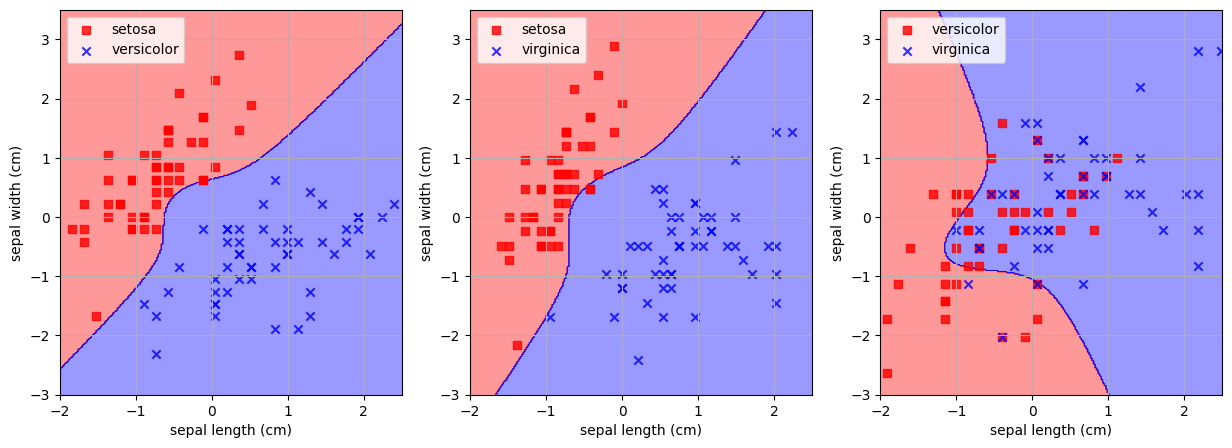

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=2)]
y = y[np.where(y!=2)]

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=poly_svc, labels=['setosa', 'versicolor'], ax=ax[0])
ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

print("Accuracy using poly SVM (setosa vs versicolor)", accuracy_score(poly_svc.predict(X_test), y_test))
print(classification_report(y_test, poly_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=1)]
y = y[np.where(y!=1)]
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc1 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc1, labels=['setosa', 'virginica'], ax=ax[1])
ax[1].set_xlabel(feat[0])
ax[1].set_ylabel(feat[1])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].grid()

print("Accuracy using poly SVM (setosa vs virginica)", accuracy_score(poly_svc1.predict(X_test), y_test))
print(classification_report(y_test, poly_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=0)]
y = y[np.where(y!=0)]
y[y != 2] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc2 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc2, labels=['versicolor', 'virginica'], ax=ax[2])
ax[2].set_xlabel(feat[0])
ax[2].set_ylabel(feat[1])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2.5, -3, 3.5])
ax[2].grid()

print("Accuracy using poly SVM (versicolor vs virginica)", accuracy_score(poly_svc2.predict(X_test), y_test))
print(classification_report(y_test, poly_svc2.predict(X_test)))

<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (setosa vs versicolor) 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

Accuracy using poly SVM (setosa vs virginica) 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (versicolor vs virginica) 0.65
              precision    recall  f1-score   support

           0       0.85      0.48      0.61        23
           1       0.56      0.88      0.68        17

    accuracy                           0.65        40
   macro avg       0.70      0.68      0.65        40
weighted avg       0.72      0.65      0.64        40



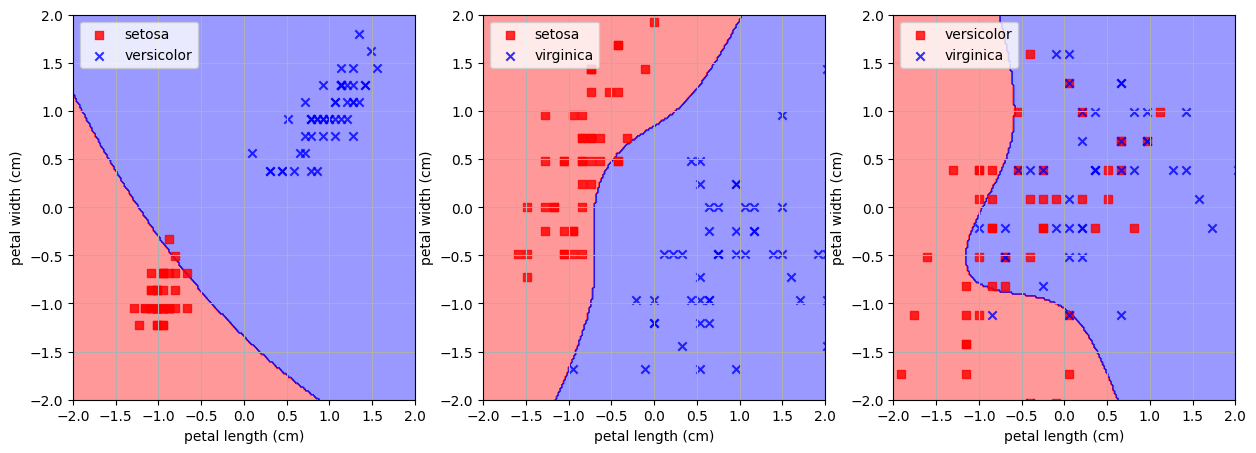

In [7]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  
y = iris.target
X = X[np.where(y!=2)]
y = y[np.where(y!=2)]

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=poly_svc, labels=['setosa', 'versicolor'], ax=ax[0])
ax[0].set_xlabel(feat[2])
ax[0].set_ylabel(feat[3])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2., -2, 2.])
ax[0].grid()

print("Accuracy using poly SVM (setosa vs versicolor)", accuracy_score(poly_svc.predict(X_test), y_test))
print(classification_report(y_test, poly_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=1)]
y = y[np.where(y!=1)]
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc1 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc1, labels=['setosa', 'virginica'], ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()

print("Accuracy using poly SVM (setosa vs virginica)", accuracy_score(poly_svc1.predict(X_test), y_test))
print(classification_report(y_test, poly_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  
y = iris.target
X = X[np.where(y!=0)]
y = y[np.where(y!=0)]
y[y != 2] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc2 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc2, labels=['versicolor', 'virginica'], ax=ax[2])
ax[2].set_xlabel(feat[2])
ax[2].set_ylabel(feat[3])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2., -2, 2.])
ax[2].grid()

print("Accuracy using poly SVM (versicolor vs virginica)", accuracy_score(poly_svc2.predict(X_test), y_test))
print(classification_report(y_test, poly_svc2.predict(X_test)))

### <span style="color:purple">one-vs-all SVM with poly(degree=3) kernel classifiers</span>

<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (setosa vs all) 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.95      1.00      0.97        37

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (versicolor vs all) 0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        19
           1       0.72      1.00      0.84        41

    accuracy                           0.73        60
   macro avg       0.86      0.58      0.55        60
weighted avg       0.81      0.73      0.66        60

Accuracy using poly SVM (virginica vs all) 0.8166666666666667
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        18
           1       0.79      1.00      0.88        42

    accuracy                           0.82        60
   macro avg       0.90      0.69      0.72        60
weighted avg       0.85      0.82      0.79        60



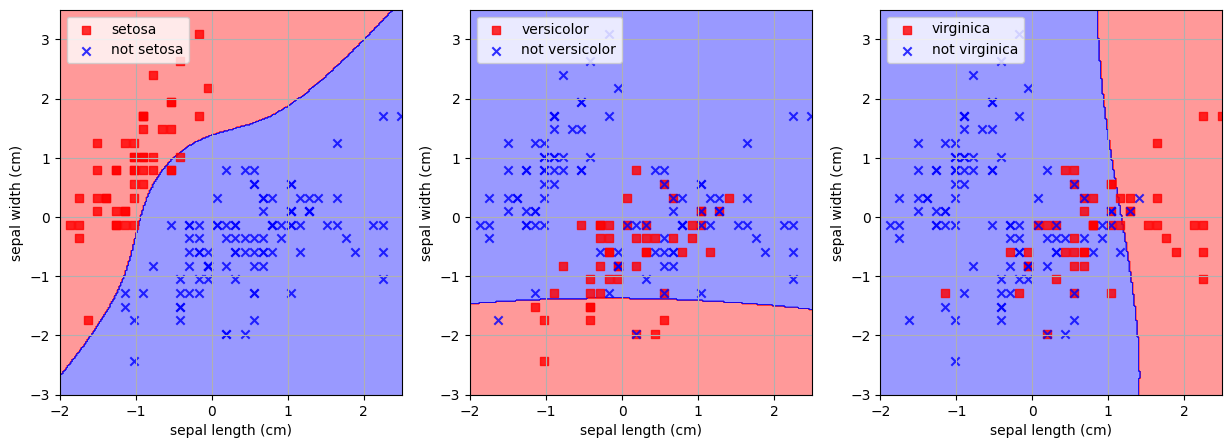

In [8]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  

y = iris.target
y[y != 0] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=poly_svc, labels=['setosa', 'not setosa'], ax=ax[0])
ax[0].set_xlabel(feat[0])
ax[0].set_ylabel(feat[1])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2.5, -3, 3.5])
ax[0].grid()

print("Accuracy using poly SVM (setosa vs all)", accuracy_score(poly_svc.predict(X_test), y_test))
print(classification_report(y_test, poly_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  

y = iris.target
y[y == 0] = 2 
y[y == 1] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc1 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc1, labels=['versicolor', 'not versicolor'], ax=ax[1])
ax[1].set_xlabel(feat[0])
ax[1].set_ylabel(feat[1])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2.5, -3, 3.5])
ax[1].grid()

print("Accuracy using poly SVM (versicolor vs all)", accuracy_score(poly_svc1.predict(X_test), y_test))
print(classification_report(y_test, poly_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  

y = iris.target
y[y != 2] = 1 
y[y == 2] = 0 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc2 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc2, labels=['virginica', 'not virginica'], ax=ax[2])
ax[2].set_xlabel(feat[0])
ax[2].set_ylabel(feat[1])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2.5, -3, 3.5])
ax[2].grid()

print("Accuracy using poly SVM (virginica vs all)", accuracy_score(poly_svc2.predict(X_test), y_test))
print(classification_report(y_test, poly_svc2.predict(X_test)))

<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy using poly SVM (setosa vs all) 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



<ipython-input-5-7e7e429390e3>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

Accuracy using poly SVM (versicolor vs all) 0.6833333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.68      1.00      0.81        41

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60

Accuracy using poly SVM (virginica vs all) 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.98      1.00      0.99        42

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



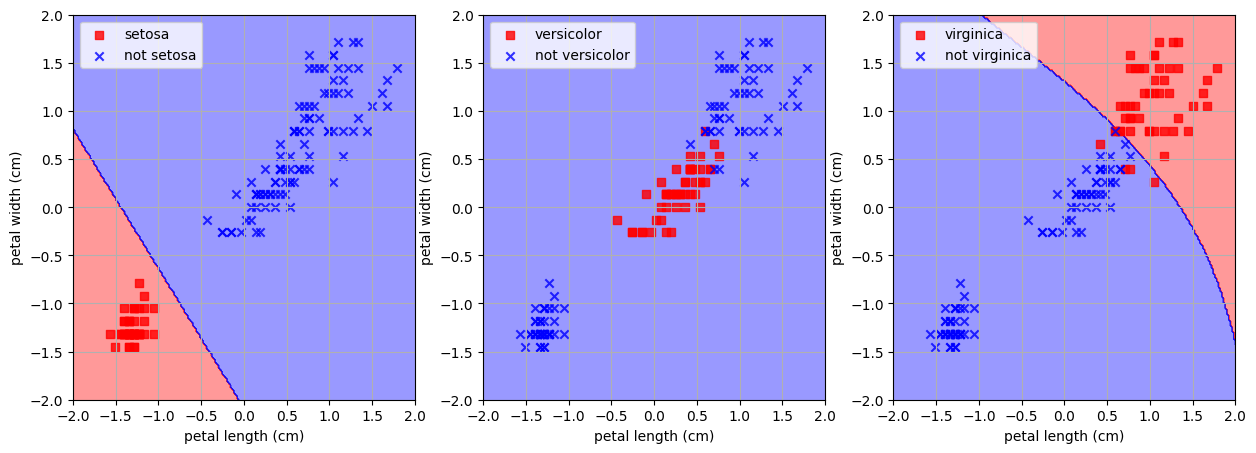

In [10]:
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  

y = iris.target
y[y != 0] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, y_train)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

plot_decision_regions(X=X, y=y, classifier=poly_svc, labels=['setosa', 'not setosa'], ax=ax[0])
ax[0].set_xlabel(feat[2])
ax[0].set_ylabel(feat[3])
ax[0].legend(loc='upper left')

ax[0].axis([-2, 2., -2, 2.])
ax[0].grid()

print("Accuracy using poly SVM (setosa vs all)", accuracy_score(poly_svc.predict(X_test), y_test))
print(classification_report(y_test, poly_svc.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  

y = iris.target
y[y == 0] = 2 
y[y == 1] = 0 
y[y == 2] = 1 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc1 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc1, labels=['versicolor', 'not versicolor'], ax=ax[1])
ax[1].set_xlabel(feat[2])
ax[1].set_ylabel(feat[3])
ax[1].legend(loc='upper left')

ax[1].axis([-2, 2., -2, 2.])
ax[1].grid()

print("Accuracy using poly SVM (versicolor vs all)", accuracy_score(poly_svc1.predict(X_test), y_test))
print(classification_report(y_test, poly_svc1.predict(X_test)))

#

iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, 2:4]  

y = iris.target
y[y != 2] = 1 
y[y == 2] = 0 

X = preprocessing.StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

poly_svc2 = SVC(kernel='poly', degree=3).fit(X_train, y_train)

plot_decision_regions(X=X, y=y, classifier=poly_svc2, labels=['virginica', 'not virginica'], ax=ax[2])
ax[2].set_xlabel(feat[2])
ax[2].set_ylabel(feat[3])
ax[2].legend(loc='upper left')

ax[2].axis([-2, 2., -2, 2.])
ax[2].grid()

print("Accuracy using poly SVM (virginica vs all)", accuracy_score(poly_svc2.predict(X_test), y_test))
print(classification_report(y_test, poly_svc2.predict(X_test)))